In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from google.colab.patches import cv2_imshow

In [ ]:
img=cv2.imread('/content/drive/MyDrive/CV_images/Set-3-q1.jpg', 0)

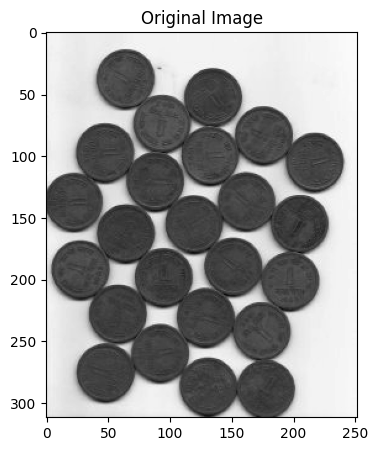

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

In [ ]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

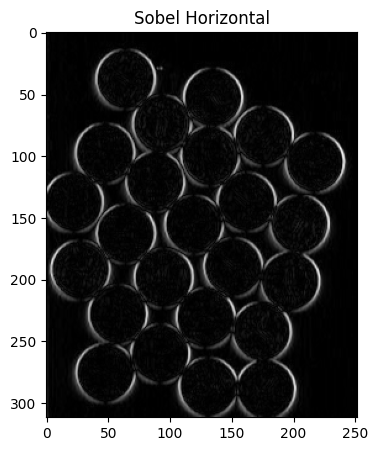

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel Horizontal')
plt.show()

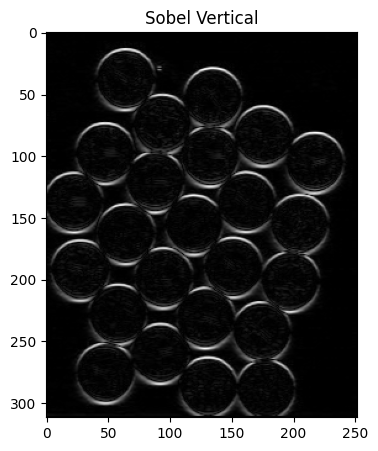

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Vertical')
plt.show()

In [ ]:
img_sobel = sobel_x + sobel_y

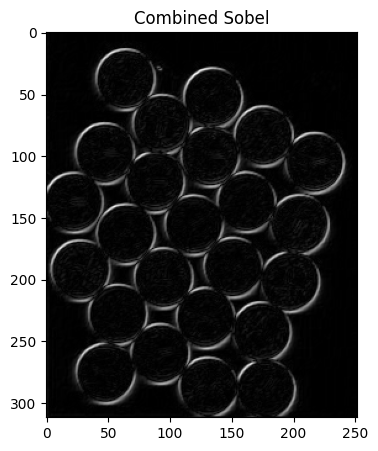

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(img_sobel), cmap='gray')
plt.title('Combined Sobel')
plt.show()

The Sobel operator serves as a crucial tool in image processing, particularly for edge detection. It functions by computing the estimated derivative of image intensity along the horizontal axis. As a result, it generates a fresh image illustrating the extent of intensity alterations at every pixel.

When applied, the Sobel operator identifies edges by yielding high magnitude values at corresponding pixels. This occurs due to significant intensity gradients present at these locations.

In the resulting image, brighter pixels signify a more pronounced change in intensity within the original image, thereby highlighting areas of interest.


In [ ]:
prewitt_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewitt_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [ ]:
img_prewittx = cv2.filter2D(img, -1, prewitt_x)
img_prewitty = cv2.filter2D(img, -1, prewitt_y)

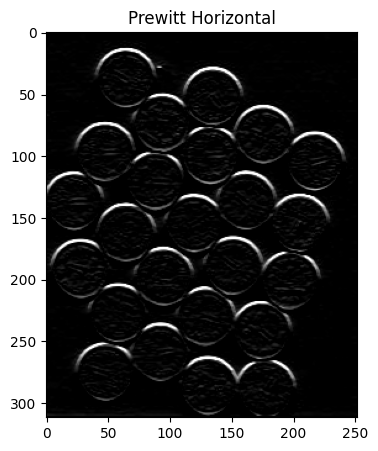

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(img_prewittx), cmap='gray')
plt.title('Prewitt Horizontal')
plt.show()

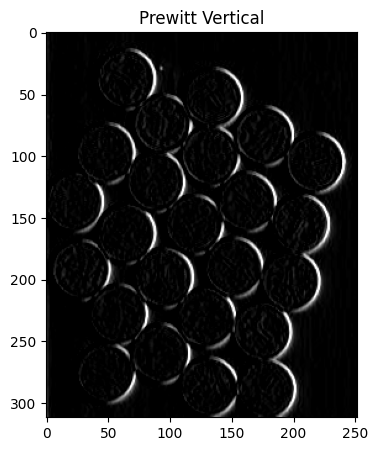

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(img_prewitty), cmap='gray')
plt.title('Prewitt Vertical')
plt.show()

In [ ]:
Combined_prewitt = img_prewittx + img_prewitty

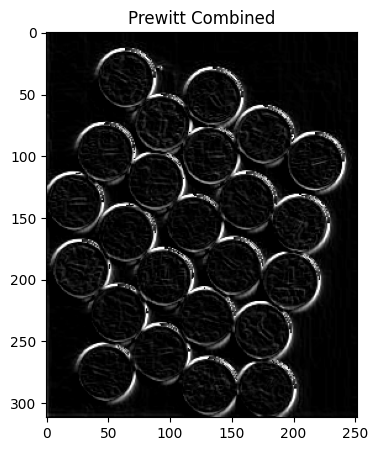

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(Combined_prewitt), cmap='gray')
plt.title('Prewitt Combined')
plt.show()

The Prewitt operator is a filter utilized in image processing for edge detection. Its functionality involves computing an approximate gradient of image intensity across both horizontal and vertical directions. The outcome of applying the Prewitt operator is a fresh image depicting the magnitude of intensity alterations at each pixel.

High magnitude values are observed at pixels situated on edges when the Prewitt operator is employed. This phenomenon occurs due to significant intensity gradients existing at these specific points.

Additionally, the text overlay on the image confirms that it's the outcome of merging both horizontal and vertical components.

In [ ]:
roberts_cross_y = np.array( [[1, 0 ], [0,-1 ]] )
roberts_cross_x = np.array( [[ 0, 1 ], [ -1, 0 ]] )

In [ ]:
vertical = ndimage.convolve( img, roberts_cross_y )
horizontal = ndimage.convolve( img, roberts_cross_x )

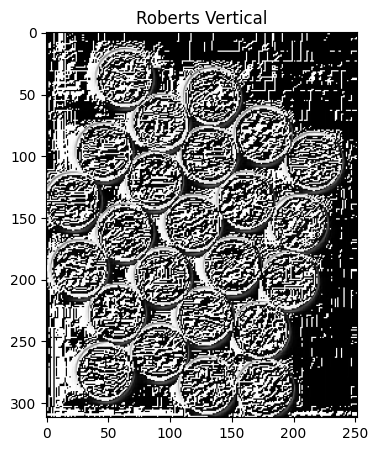

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(vertical), cmap='gray')
plt.title('Roberts Vertical')
plt.show()

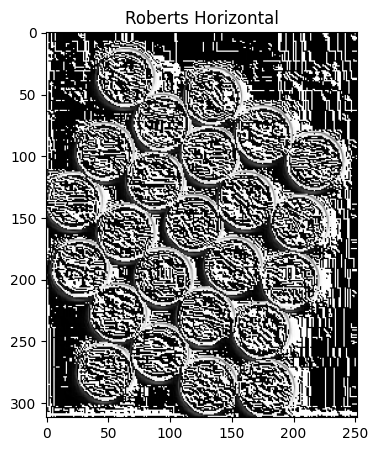

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(horizontal), cmap='gray')
plt.title('Roberts Horizontal')
plt.show()

In [ ]:
combined_robert = np.sqrt(np.square(horizontal) + np.square(vertical))

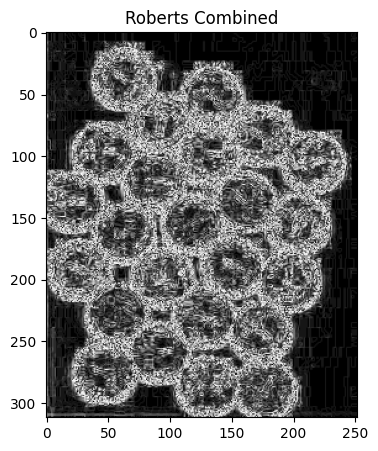

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(combined_robert), cmap='gray')
plt.title('Roberts Combined')
plt.show()

The Roberts operator is like a tool used in image editing to find edges. It does this by looking at how much the colors change from one pixel to the next, both horizontally and vertically. The result is a new picture that shows where these changes are strongest.

When you use the Roberts operator, it highlights areas where there are sharp changes in color or brightness. This is usually where edges are. The text on the picture tells you that it's a combination of the horizontal and vertical parts.

Edges are where the colors or brightness change a lot. The stronger the change, the brighter it shows up in the picture. By putting together the horizontal and vertical parts, the Roberts operator can find edges no matter which way they go.

But one thing to remember is that the Roberts operator can be tricked by noise more easily than some other similar tools.

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/CV_images/set-3-q2.tif', 0)

array([[203, 203, 203, ..., 203, 203, 203],
       [203, 203, 203, ..., 203, 203, 203],
       [204, 204, 204, ..., 204, 204, 204],
       ...,
       [201, 202, 203, ..., 122, 153, 162],
       [194, 198, 202, ..., 123, 154, 162],
       [189, 194, 201, ..., 125, 155, 163]], dtype=uint8)
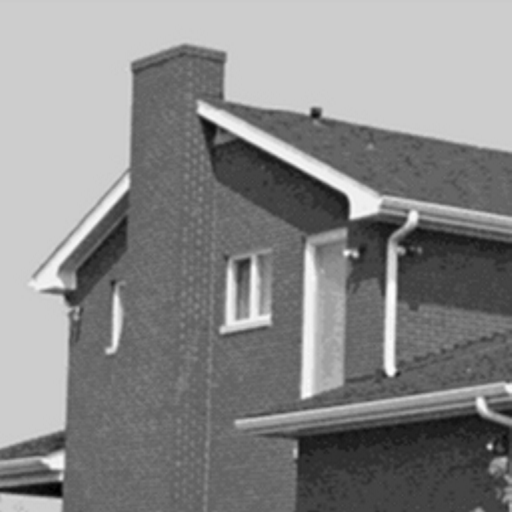

In [ ]:
img2

In [ ]:
blurred_img = cv2.GaussianBlur(img2, (5, 5), 0)

_, thresh_img = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    area = cv2.contourArea(contour)
    if area < 100:
        continue

    mask = np.zeros_like(img2)
    cv2.drawContours(mask, [contour], -1, 255, -1)
    mean_intensity = cv2.mean(img2, mask=mask)[0]

    print("Contour Area:", area)
    print("Mean Intensity:", mean_intensity)
    print("-----------------------------")

Contour Area: 896.0
Mean Intensity: 200.0246913580247
-----------------------------
Contour Area: 502.5
Mean Intensity: 192.49063032367974
-----------------------------
Contour Area: 2260.0
Mean Intensity: 173.39443155452437
-----------------------------
Contour Area: 508.0
Mean Intensity: 199.33044982698962
-----------------------------
Contour Area: 1878.5
Mean Intensity: 198.81747947851278
-----------------------------
Contour Area: 1299.5
Mean Intensity: 212.62986111111113
-----------------------------
Contour Area: 5252.5
Mean Intensity: 186.93102817416758
-----------------------------
Contour Area: 4683.5
Mean Intensity: 208.76660079051382
-----------------------------
Contour Area: 83797.0
Mean Intensity: 204.21864057065378
-----------------------------


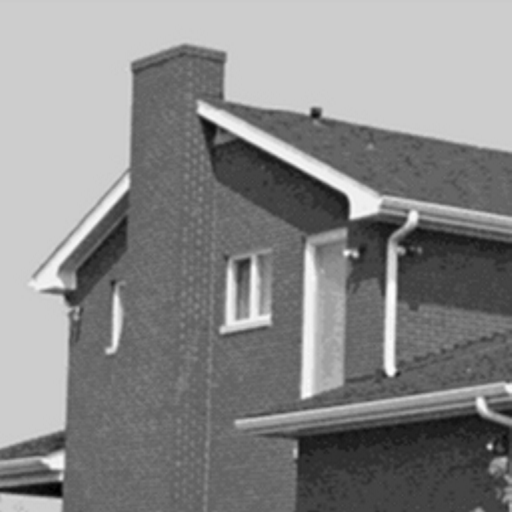

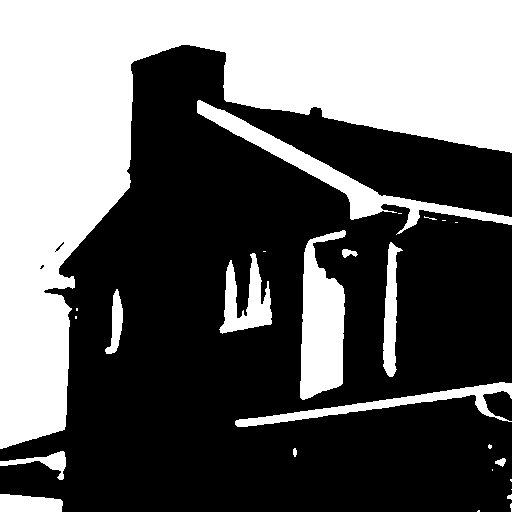

In [ ]:
cv2_imshow(img2)
cv2_imshow(thresh_img)

In [ ]:
horizontal = np.array([[-1, -1, -1],
                    [2, 2, 2],
                    [-1, -1, -1]])
horline_img = cv2.filter2D(src=img2, ddepth=-1, kernel=horizontal)

In [ ]:
vertical = np.array([[-1, 2, -1],
                    [-1, 2, -1],
                    [-1, 2, -1]])
verline_img = cv2.filter2D(src=img2, ddepth=-1, kernel=vertical)

(-0.5, 511.5, 511.5, -0.5)

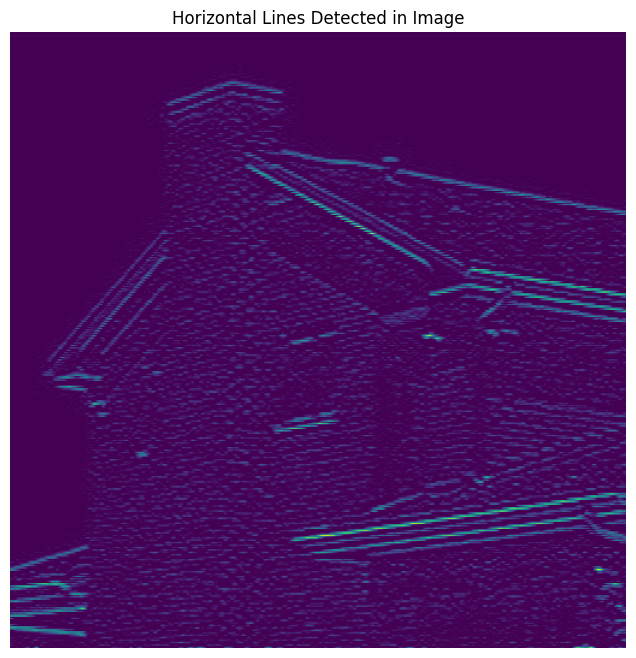

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Horizontal Lines Detected in Image")
plt.imshow(horline_img)
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

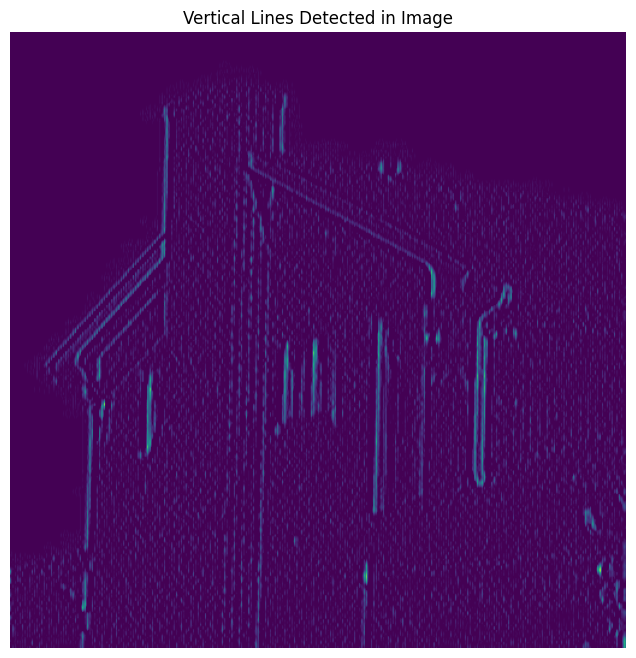

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Vertical Lines Detected in Image")
plt.imshow(verline_img)
plt.axis("off")

In [ ]:
plus45 = np.array([[-1, -1, 2],
                   [-1, 2, -1],
                   [-1, 2, -1]])
plus45_img2 = cv2.filter2D(src=img2, ddepth=-1, kernel=plus45)

In [ ]:
minus45 = np.array([[2, -1, -1],
                   [-1, 2, -1],
                   [-1, -1, 2]])
minus45_img2 = cv2.filter2D(src=img2, ddepth=-1, kernel=minus45)

(-0.5, 511.5, 511.5, -0.5)

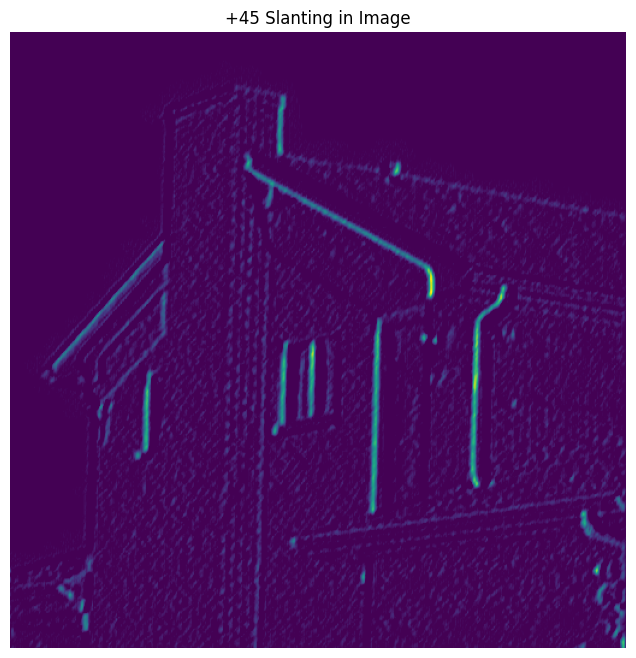

In [ ]:
plt.figure(figsize=(8,8))
plt.title("+45 Slanting in Image")
plt.imshow(plus45_img2)
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

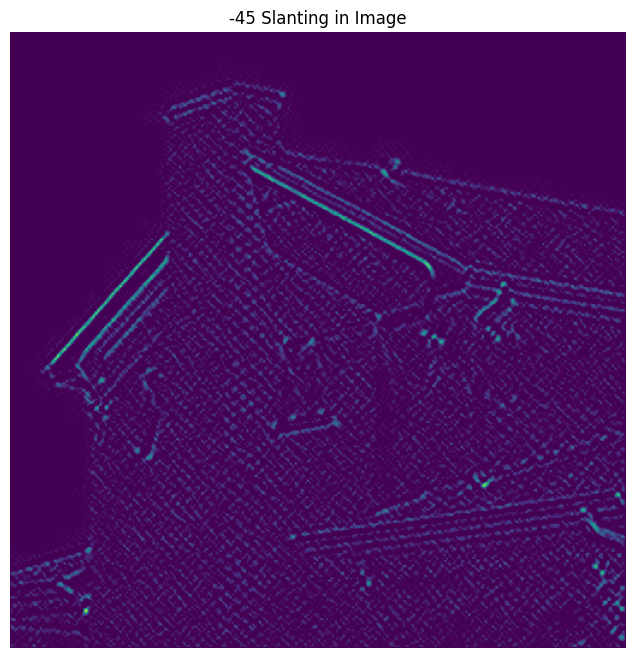

In [ ]:
plt.figure(figsize=(8,8))
plt.title("-45 Slanting in Image")
plt.imshow(minus45_img2)
plt.axis("off")